### 一、模型融合

- **模型融合（Model Integration）**

> **对Task 05 调优后的模型, 进行模型融合。例如, 用目前评分最高的模型作为基准模型, 和其他模型进行Stacking 模型融合, 得到最终模型和评分**

> **模型融合，通常可以在各种不同的机器学习任务中使结果获得提升，即综合考虑不同模型的情况，并将它们的结果融合到一起**

> ### 多数表决融合: 模型融合能提高准确率以及对低相关的结果进行融合可以获得更好结果

> **多数表决的融合方式默认了所有模型的重要度是一样的，但通常情况下我们会更重视表现较好的模型而需要赋予更大的权值**

> ### 加权表决融合: 在加权表决的情况下，表现较差的模型只能通过与其他模型获得一样的结果来增强自己的说服力

> ### 对结果取平均

> **对结果取平均在很多机器学习问题上以及不同的评估准则上都获得很不错的结果**

> **取均值的做法常常可以减少过拟合现象**

> **在机器学习的应用上，过拟合现象是很普遍的，根本问题是训练数据量不足以支撑复杂的模型，导致模型学习到数据集上的噪音，这样产生的问题使得模型很难泛化，因为模型“考虑”的过分片面**

> **如果对结果取平均，可以在一定程度上减轻过拟合现象**

> ### 机器学习的目的并不是让模型**记住**训练数据，而是对**未知数据**有更好的**推广**

> ### Stacking

> **Stacking的基本思想是用一些 基分类器 进行分类，然后使用另一个分类器对结果进行整合**

> ### Blending

> **Blending 与 Stacking 的主要区别在于训练集不是通过 K-Fold 的 交叉验证策略 来获得 预测值 从而生成 模型的特征 ，而是建立一个 Holdout集 **

> **即把 Stacking 流程中的 K-Fold 交叉验证 改成 HoldOut 交叉验证**

> **Blending优点在于：**

> 1.比stacking简单（因为不用进行k次的交叉验证来获得stacker feature）

> 2.避开了一个信息泄露问题：generlizers和stacker使用了不一样的数据集

>3.在团队建模过程中，不需要给队友分享自己的随机种子

> **Blending 缺点在于：**

> 1.使用了很少的数据

> 2.blender可能会过拟合

> 3.Stacking使用多次的交叉验证会比较稳健对于实践中的结果而言，Stacking和Blending的效果是差不多的，所以使用哪种方法都没什么所谓，完全取决于个人爱好

### 二、任务说明：

- 利用 **金融数据** 来预测贷款用户是否会逾期
- 其中，**“status”** 是结果标签：**0** 表示未逾期，**1** 表示逾期

### 三、任务要求：

> **模型融合（Model Integration）**

> **模型融合，模型融合方式任意，并结合 Task 05 给出最优结果**

> **Stacking 或 Blending 融合，用目前评分最高的模型作为基准模型，和其他模型进行 Stacking 融合，得到最终模型及评分结果**


### 四、任务实现（模型融合）：（2 Days）

### 6.1 数据加载

In [40]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [41]:
# 数据集的加载
data = pd.read_csv('Dataset/data.csv')
# 剔除重复特征
data.drop_duplicates(inplace=True)
print(data.shape)
data.head()

(4754, 90)


,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [42]:
import pickle

# 载入特征 获取label
with open('feature.pkl', 'rb') as f:
    X = pickle.load(f)

# 观测正负样本是否均衡
y = data.status
y.value_counts()

0    3561
1    1193
Name: status, dtype: int64

### 6.2 数据集划分

In [43]:
# 划分数据集（训练集和测试集7:3 无验证集）
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2333)

# 特征归一化处理
std = StandardScaler()
X_train = std.fit_transform(X_train.values)
X_test = std.transform(X_test.values)

### 6.3 模型评估

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
def model_metrics(clf, X_train, X_test, y_train, y_test):
    # 预测训练集和测试集
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    
    # 准确率Accuracy
    print('【Accuracy准确率】', end = ' ')
    print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
    # 精准率Precision
    print('【Prediction精准率】', end = ' ')
    print('训练集：', '%.4f'%precision_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%precision_score(y_test, y_test_pred))

    # 召回率Recall
    print('【Recall召回率】', end = ' ')
    print('训练集：', '%.4f'%recall_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%recall_score(y_test, y_test_pred))
    
    # f1-score
    print('【F1-score】', end = ' ')
    print('训练集：', '%.4f'%f1_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%f1_score(y_test, y_test_pred))
    
    # AUC取值
    print('【AUC取值】', end = ' ')
    print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    # ROC曲线
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label = 1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label = 1)
    
    label = ["Train - AUC:{:.4f}".format(auc(fpr_train, tpr_train)), 
             "Test - AUC:{:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train,tpr_train)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc = 4)
    plt.title("ROC Curve")

### 6.4 模型导入

> ### 导入不同分类器模型__LR, SVM, DT, RF, XGBoost, MLXtend

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

### 6.5 模型融合

> ### 6.5.1 利用 MLXtend 库中的 StackingClassifier 分类器进行 模型融合

In [47]:
from mlxtend.classifier import StackingClassifier

In [48]:
# 模型调优后得到的参数
lr = LogisticRegression(C = 0.1, penalty = 'l1')
svm_linear = svm.SVC(C = 0.01, kernel = 'linear', probability=True)
svm_poly =  svm.SVC(C = 0.01, kernel = 'poly', probability=True)
svm_rbf =  svm.SVC(gamma = 0.01, C =0.01 , probability=True)
svm_sigmoid =  svm.SVC(C = 0.01, kernel = 'sigmoid',probability=True)
dt = DecisionTreeClassifier(max_depth=11,min_samples_split=550,min_samples_leaf=80,max_features=19)
rf = RandomForestClassifier(n_estimators=120, max_depth=9, min_samples_split=50,\
                            min_samples_leaf=20, max_features = 9,oob_score=True, random_state=2333)
xgb = XGBClassifier(learning_rate =0.01, n_estimators=180, max_depth=3, min_child_weight=5, \
                    gamma=0.4, subsample=0.5, colsample_bytree=0.9, reg_alpha=1,\
                    objective= 'binary:logistic', nthread=4,scale_pos_weight=1, seed=27)

> ### 6.5.2 手动实现 Stacking 存在问题

In [9]:
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

In [10]:
def stacking(train_x, train_y, test):
    """ stacking
    input: train_x, train_y, test
    output: test的预测值
    clfs: 5个一级分类器
    dataset_blend_train: 一级分类器的prediction, 二级分类器的train_x
    dataset_blend_test: 二级分类器的test
    """
    # 5个一级分类器
    clfs = [SVC(C = 3, kernel="rbf"),
            RandomForestClassifier(n_estimators=100, max_features="log2", max_depth=10, min_samples_leaf=1, bootstrap=True, n_jobs=-1, random_state=1),
            KNeighborsClassifier(n_neighbors=15, n_jobs=-1),
            xgb.XGBClassifier(n_estimators=100, objective="binary:logistic", gamma=1, max_depth=10, subsample=0.8, nthread=-1, seed=1),
            ExtraTreesClassifier(n_estimators=100, criterion="gini", max_features="log2", max_depth=10, min_samples_split=2, min_samples_leaf=1,bootstrap=True, n_jobs=-1, random_state=1)]
    
    # 二级分类器的train_x, test
    dataset_blend_train = np.zeros((train_x.shape[0], len(clfs)), dtype=np.int)
    dataset_blend_test = np.zeros((test.shape[0], len(clfs)), dtype=np.int)
    
    # 5个分类器进行8_folds预测
    n_folds = 8
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)
    for i,clf in enumerate(clfs):
        dataset_blend_test_j = np.zeros((test.shape[0], n_folds))  # 每个分类器的单次fold预测结果
        for j,(train_index,test_index) in enumerate(skf.split(train_x, train_y)):
            tr_x = train_x[train_index]
            tr_y = train_y[train_index]
            clf.fit(tr_x, tr_y)
            dataset_blend_train[test_index, i] = clf.predict(train_x[test_index])
            dataset_blend_test_j[:, j] = clf.predict(test)
        dataset_blend_test[:, i] = dataset_blend_test_j.sum(axis=1) // (n_folds//2 + 1)
    
    # 二级分类器进行预测
    clf = LogisticRegression(penalty="l1", tol=1e-6, C=1.0, random_state=1, n_jobs=-1)
    clf.fit(dataset_blend_train, train_y)
    prediction = clf.predict(dataset_blend_test)
    return prediction

In [13]:
# prediction = stacking(X_train, y_train, X_test)

> ### 6.5.3 自动调用实现 模型融合

> **6.5.3.1 利用5种SVM、决策树、随机森林以及XGBoost作为初级分类器，LR作为次级分类器**

In [49]:
sclf = StackingClassifier(classifiers=[svm_linear, svm_poly, svm_rbf, svm_sigmoid, dt, rf, xgb], meta_classifier=lr)

> **6.5.3.2 将初级分类器产生的 类别标签  sclf 作为新特征**

In [50]:
import warnings
warnings.filterwarnings("ignore")

【Accuracy准确率】 训练集： 0.8118 测试集： 0.7940
【Prediction精准率】 训练集： 0.8794 测试集： 0.8242
【Recall召回率】 训练集： 0.2952 测试集： 0.2125
【F1-score】 训练集： 0.4421 测试集： 0.3378
【AUC取值】 训练集： 0.6652 测试集： 0.6403


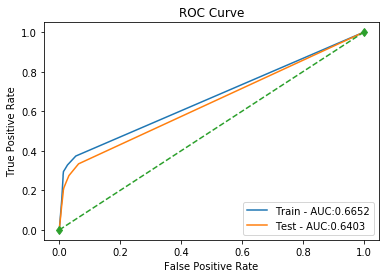

In [51]:
sclf.fit(X_train, y_train.values)
model_metrics(sclf, X_train, X_test, y_train, y_test)

> **6.5.3.3 将初级分类器产生的输出 类概率 use_probas 作为新特征**

In [54]:
sclf = StackingClassifier(classifiers=[svm_linear, svm_poly, svm_rbf, svm_sigmoid, dt, rf, xgb], meta_classifier=lr, use_probas=True,average_probas=False)

【Accuracy准确率】 训练集： 0.8518 测试集： 0.7919
【Prediction精准率】 训练集： 0.7887 测试集： 0.6176
【Recall召回率】 训练集： 0.5643 测试集： 0.4164
【F1-score】 训练集： 0.6579 测试集： 0.4975
【AUC取值】 训练集： 0.9027 测试集： 0.7823


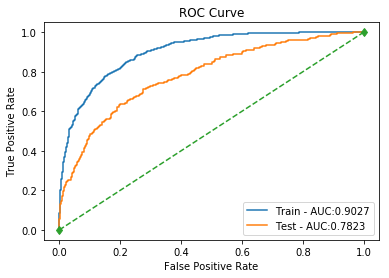

In [55]:
sclf.fit(X_train, y_train.values)
model_metrics(sclf, X_train, X_test, y_train, y_test)

### 五、讨论与问题（Discussion & Question）

> #### 比较模型融合之前和融合之后的效果差异，分析导致产生差异的关键因素/原因在哪里？

### 六、总结（Conclusion）

> #### Task01 Data Analysis (数据分析)

> #### Task02 Feature Engineering (特征工程)

> #### Task03  Mdel Construction(模型构建)

> #### Task04  Model Evaluation(模型评估)

> #### Task05  Model Tuning(模型调优)

> #### Task06  Model Integration(模型融合)

### Conference

> **[模型融合方法总结](https://blog.csdn.net/hust_tsb/article/details/76577599)**

> **[模型融合方法](https://blog.csdn.net/sinat_29819401/article/details/71191219)**

> **[KAGGLE ENSEMBLING GUIDE](https://mlwave.com/kaggle-ensembling-guide/)**